# **The Challenge in Python**

This project was initially written as a submission for the "[Titanic: Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic)" Competition. This challenge called for participants to predict whether a passenger on the titanic would survive or not. The Titanic dataset provided a diverse amount of information about passengers such as economic status, sex, age, survival and more.  
  
  This project will display a full walkthrough of the procress of creating a machine learning model, data exploration, data cleaning and analysis through various classification methods.
* Logistics Regression
* Random Forest
* Decision Tree
* K Nearest Neighbor

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#packages for Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Importing Data 
  
  The data referenced below and used throughout this project is sources directly from ["*Titanic: Machine Learning from Disaster*"](https://www.kaggle.com/competitions/titanic/data)

In [2]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')
combine = [train_df, test_df]

# Data Exploration 
  
I started the data exploration process by trying to answer the following questions to become more familiar with the data types and quantity of data.
1. Which features are listed in the dataset?
2. Which features are categorical or numerical?
3. Which features include mixed data types?
4. Which features may contain errors, typos or missing data?

### The Features  
  
  1. **Which features are listed in the data set?**  
    
    PassengerID, Survived, Pclass, Name, Sex, Age, Sibsp, Parch, Ticket, Fare, Cabin and Embarked. This was discovered through the process below.

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


2. **Which features are categorical or numerical?**  
  
  Previewing the data found a few different data types in each feature. The data types included are defined as follows. [Catergorical data](http://www.stat.yale.edu/Courses/1997-98/101/catdat.htm) is defined as a variable that can take one of a limited, usually fixed, number of possible values. [Ordinal data](https://www.scribbr.com/statistics/ordinal-data/) is a type of categorical data but it refers to a type of data that can be ranked in a natural order . [Continuous data](https://www.isixsigma.com/dictionary/continuous-data/) is a type of numerical data that be measured on an infinate scale. [Discrete data](https://www.thedrum.com/profile/whatagraph/news/discrete-vs-continuous-data-whats-the-difference) is a data type that involves integers and a limited number of values possible.  
    
    * Categorical: Survived, Sex and Embarked
    * Ordinal: Pclass
    *Continous: Age, Fare
    *Discrete: SibSp, Parch

In [4]:
#Previewing the data to determine data types and column headers.
#The head command is used to output the first part of the file.
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. **Which features include mixed data types?**  
  
  Ticket and Cabin have mixed data types  
    
4. **Which features may contain errors, typos or missing data?**  
  
  This will be determined throughout the data cleaning and exploration process as it is more difficult to determine during prelimiary looks. 

In [5]:
#Previewing data continued
#The tail command will output of last part of the file.
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#display nulls in data within range
train_df.info()
print('_'*10)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
__________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1

In [7]:
# determine the number of null or missing values in each column for train set
#to be used later
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#determine the number of null or missing value in each column for test set
#to be used later
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Cleaning Data
Now that I have an idea of what types of data are in the set and have an idea of what data is missing the process of cleaning or wrangling data begins. The focus of this process is to transform and unify the data for easy access and analysis. I will do this by dropping and adding features, converting data types and completing numerical continuous features. 


## Unifying Categorical Features
In order to unify certain aspects of the data I converted features that contain strings to numerical values. Numerical values are favored by most models and will create consistancy through the features.  
  
  The feature Sex will be converted to a discrete data type where female = 1 and male = 0.

In [9]:
for dataset in combine:
        dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
        
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


## Completing Continuous Feature
Through the exploration of the data and its features above it was found that 177 data points for age were missing. In order to correct this use the randomized age data will be generated using the mean age and standard deviation of the data set to account for the missing values.

In [10]:
#compute mean and standard dev of Age
age_mean = train_df['Age'].mean()
age_std = train_df['Age'].std()

#number of NaN values (non number values)
num_na = train_df['Age'].isna().sum()

#generate random ages from mean and standard dev
random_vals = age_mean + age_std * np.random.randn(num_na)

#replace missing values with random_vals
train_df.loc[train_df['Age'].isna(), 'Age'] = random_vals

# convert to whole numbers
train_df['Age'] = train_df['Age'].astype(np.int64)

#view data to check work
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,24,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",0,32,0,0,370376,7.75,NaN,Q


In [11]:
#Verify that missing values for age have been replaced.
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


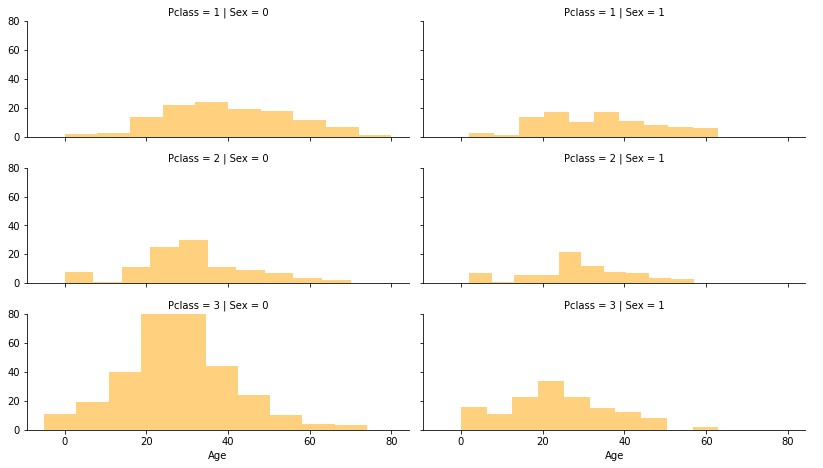

In [12]:
grid = sns.FacetGrid(train_df, row= 'Pclass', col= 'Sex', size = 2.2, aspect = 2.6)
grid.map(plt.hist, 'Age', alpha= .5, bins=10, color= 'orange')
plt.ylim((0,80))
grid.add_legend()

## Completing a Categorical Feature
Throughout the process of data exploration it was found that data points in the feature embarked were missing. In order to correct this I will fill those spaces with the most common occurance before converting the categorical feature to numeric.

In [13]:
#discover the most frequently used port
port = train_df.Embarked.dropna().mode()[0]
port

'S'

In [14]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], 
                                as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [15]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
#convert categorical embarked feature to numeric
#this creates a unifying data type for analysis

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0


## Correction by dropping features
*insert details*

In [17]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

# Data Visualization
Data visualization is a useful tool for data cleaning as it can assist with detecting outliers, missing values, implicit boundaries and much more. In this case I will be using it to check the effectiveness of my data cleaning methods as well as correlating various related features. 

### Age vs Survival
 
Throughout the cleaning process I noticed a few relationships between age and survival. Most passangers in this data set are in the age range 15-35 years old. The oldest surviving passanger was 80 years old and children under the age of 4 had a high survival rate.

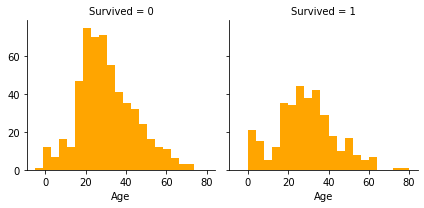

In [18]:
age_hist = sns.FacetGrid(train_df, col= 'Survived')
age_hist.map(plt.hist, 'Age', bins = 20, color = "Orange")

###  Survival Classified by Age and Passenger Class


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


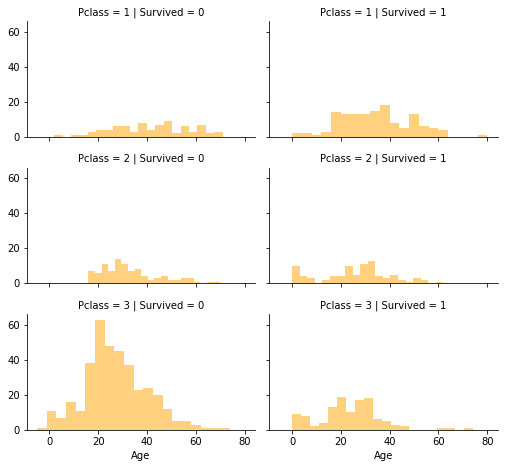

In [19]:
grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = .5, bins = 20, color = "Orange")
grid.add_legend();

### Survival by Sex, Passenger Class and Embarking Port


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


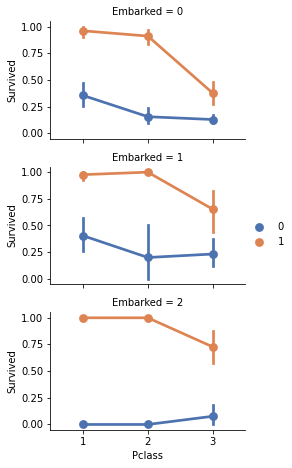

In [20]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

# Predicitive Modeling 

[Predicitive modeling](https://www.gartner.com/en/information-technology/glossary/predictive-modeling) is a commonly used statistical techinque to predict future behavior by analyzinf historical and current data and generation a model to help predict outcomes.

* Logistic Regression
* Random Forest
* k-Nearest Neighbors
* Decision Tree

In [21]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 8))

### Logistic Regression
Logistic regression is a statisical model used to handle classification problems. [Logistic regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc) is a process of modeling the probablity of a discrete outcome given an input variable. In other words it measures the realatoinship between the categorical depedent feature and one of more independent features.

In [22]:
# Logistic Regression

train_df['Survived'] = train_df['Survived'].astype(np.int64)

#logreg = LogisticRegression()
#logreg.fit(X_train, Y_train)
#Y_pred = logreg.predict(X_test)
#acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
#acc_log

### Decision Tree
[Decision Trees](https://scikit-learn.org/stable/modules/tree.html) are a non-parametric surpervised learning method used for classifications and regression.The goal is to use a tree like model to evaluate decisions and their possible outcomes including things such as probablity, cost, and other relavent features. Decision tree models 

In [23]:
# Decision Tree

#decision_tree = DecisionTreeClassifier()
#decision_tree.fit(X_train, Y_train)
#Y_pred = decision_tree.predict(X_test)
#acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
#acc_decision_tree

### Random Forest


In [24]:
# Random Forest

#random_forest = RandomForestClassifier(n_estimators=100)
#random_forest.fit(X_train, Y_train)
#Y_pred = random_forest.predict(X_test)
#random_forest.score(X_train, Y_train)
#acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
#acc_random_forest

### K-Nearest Neighbor

In [25]:
#knn = KNeighborsClassifier(n_neighbors = 3)
#knn.fit(X_train, Y_train)
#Y_pred = knn.predict(X_test)
#acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
#acc_knn

# Model Evaluation


In [26]:
#models = pd.DataFrame({
   # 'Model': ['KNN', 'Logistic Regression', 'Random Forest',  'Decision Tree'],
    #'Score': [ acc_knn, acc_log, acc_random_forest, acc_decision_tree]})
#models.sort_values(by='Score', ascending=False)